Step to follow
1. Import libray
2. Read Data
3. Text Preprocessing (cleaming and compressing data)
  - Sentence tokenization (Paragraphs to sentences) (. ! ? ;)
  - Text tokenization (Sentence to words) (space, _ :)
  - punctual , special character and converting text to lowercase
  - Stop words removal (is, a, an, the, them, couldn't)
  - Lemmatization and Stemming (Extract only the root words from data)
4. EDA
5. Encoding data (Converting Text data to numeric)
  - TF-IDF(Term Frequency- Inverse Document Frequency) - calculate the score of woord in a particular row.
  - TF-IDF = (no.of times words in row / total no.of words in row)*log(no.of rows/no.of rows containing the words)
6. Apply Machine learning
  - Split the data as training set and test set
  - Scaling the data
  - Apply machine learning algorithms
  - model evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [ ]:
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
data.shape

(1000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
data['Liked'].nunique()

2

In [ ]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [ ]:
data['length'] = data['Review'].apply(len)
data.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
data['length'].describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [ ]:
data[data['length']==90]['Review'].iloc[0]

'He came running after us when he realized my husband had left his sunglasses on the table.'

This is NLP project so we need NLTK

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[pun for pun in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
# so i create a function which remove the punctuations and stopwords
def text_process(msg):
  nopun = [char for char in msg if char not in string.punctuation]
  nopun = ''.join(nopun)
  return ' '.join([word for word in nopun.split() if word.lower() not in stopwords.words('english')])

In [ ]:
# before applying the above function
data.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
# after string tokenaization
data['tokenized_review'] = data['Review'].apply(text_process)

In [ ]:
data.head()

,Review,Liked,length,tokenized_review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


In [ ]:
data[data['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [ ]:
data[data['length']==100]['tokenized_review'].iloc[0]

'Perhaps caught night judging reviews Im inspired go back'

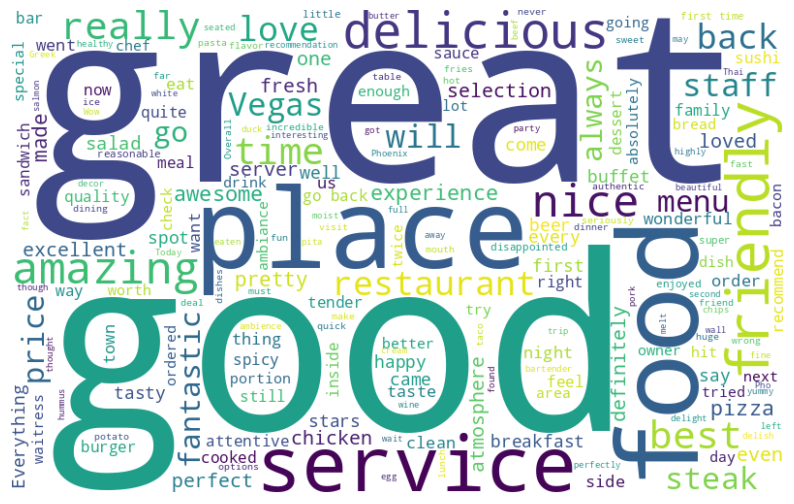

In [ ]:
# lets check positive review by forming words cloud
from wordcloud import WordCloud

word_cloud = data.loc[data['Liked']==1,:]
text = ' '.join([text for text in word_cloud['Review']])

# wordcloud
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)

# display
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

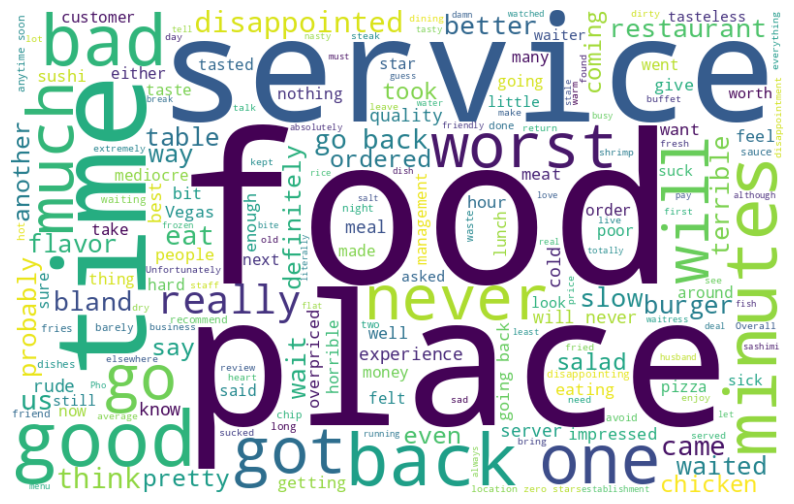

In [ ]:
# negitive review words

word_cloud_2 = data.loc[data['Liked']==0,:]
text_2 = ' '.join([char1 for char1 in word_cloud_2['Review']])

wordcloud2 = WordCloud(height=500, width=800, background_color = 'white').generate(text_2)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

# Spliting the data using Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data['tokenized_review'],data['Liked'],test_size=0.2)

In [ ]:
X_train.head()

5                            getting angry want damn pho
643              Maybe werent cold would somewhat edible
568                                       HOUR seriously
704                   cashier friendly even brought food
748    watched prices inflate portions get smaller ma...
Name: tokenized_review, dtype: object

# Encoding converting text data to numeric data using
TF-IDF(text frequency and inverse document frequency)

CountVectorizer

In [ ]:
# first let's try with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=10)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [ ]:
X_train_arr = X_train.toarray()
X_val_arr = X_val.toarray()

# Applying machine Learning algorithm


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

# training the data
nb.fit(X_train_arr, y_train)

#making prediction
y1_pred = nb.predict(X_val_arr)

In [ ]:
from sklearn.metrics import classification_report

clss_rpt = classification_report(y_val,y1_pred)

In [ ]:
clss_rpt

'              precision    recall  f1-score   support\n\n           0       0.65      0.92      0.76        99\n           1       0.87      0.51      0.65       101\n\n    accuracy                           0.71       200\n   macro avg       0.76      0.72      0.70       200\nweighted avg       0.76      0.71      0.70       200\n'

              precision    recall  f1-score   support

           0       0.80      0.36      0.49        98
           1       0.60      0.91      0.72       102

    accuracy        na        na        0.64       200
   macro avg       0.70      0.63      0.61       200
weighted avg       0.69      0.64      0.61       200

```
# This is formatted as code
```




# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train_arr, y_train)

y_pred_dt = model_dt.predict(X_val_arr)

classification_report(y_val, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.69      0.78      0.73        99\n           1       0.75      0.65      0.70       101\n\n    accuracy                           0.71       200\n   macro avg       0.72      0.72      0.71       200\nweighted avg       0.72      0.71      0.71       200\n'

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        99
           1       0.75      0.65      0.70       101

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200


# TF-IDF
It is a another method of encoding

In [ ]:
X2_train, X2_val, y2_train, y2_val = train_test_split(data['tokenized_review'],data['Liked'], test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_tfidf = TfidfVectorizer()

In [ ]:
X2_train_vec = vectorizer_tfidf.fit_transform(X2_train)
X2_val_vec = vectorizer_tfidf.transform(X2_val)
# this convert the train and test dataset to matrix

In [ ]:
X2_train_vec

<800x1702 sparse matrix of type '<class 'numpy.float64'>'
	with 4446 stored elements in Compressed Sparse Row format>

In [ ]:
# so we this matrics data to array format
X2_train_arr = X2_train_vec.toarray()
X2_val_arr = X2_val_vec.toarray()

# lets apply machine learning algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X2_train_arr,y_train)

y2_pred = model2.predict(X2_val_arr)

In [ ]:
# model evaluation
from sklearn.metrics import classification_report

classification_report(y2_val, y2_pred)

'              precision    recall  f1-score   support\n\n           0       0.52      0.51      0.52       104\n           1       0.48      0.50      0.49        96\n\n    accuracy                           0.51       200\n   macro avg       0.50      0.50      0.50       200\nweighted avg       0.51      0.51      0.51       200\n'

              precision    recall  f1-score   support

           0       0.52      0.51      0.52       104
           1       0.48      0.50      0.49        96

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.51      0.51       200


# decision tree for Tf-idf

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt1 = DecisionTreeClassifier()

model_dt1.fit(X2_train_arr, y2_train)

y_pred_dt2 = model_dt1.predict(X2_val_arr)

classification_report(y2_val, y_pred_dt2)

'              precision    recall  f1-score   support\n\n           0       0.72      0.76      0.74       104\n           1       0.72      0.68      0.70        96\n\n    accuracy                           0.72       200\n   macro avg       0.72      0.72      0.72       200\nweighted avg       0.72      0.72      0.72       200\n'

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       104
           1       0.72      0.68      0.70        96

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200
